In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df= pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Housing.csv')

In [4]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


<AxesSubplot:ylabel='Frequency'>

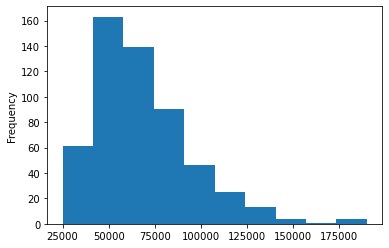

In [21]:
df['price'].plot(kind='hist')

In [12]:
X = df[['driveway']]
y = df['price']

### Encode using pandas `get_dummies` function

In [32]:
dum_X = pd.get_dummies(X, drop_first=True)      # drop_first=True to avoid the first column which is the constant column
print(dum_X.head(10))

lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)
 

   driveway_yes
0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             1
9             1
Intercept 48555.77922077924
Coeffecients [22778.11630161]
Equation of the line: 48555.77922077924 + 22778.116301608832 * X1


In [33]:
df.groupby('driveway')['price'].mean()

driveway
no     48555.779221
yes    71333.895522
Name: price, dtype: float64

### Enconde using `OneHotEncoder`